In [ ]:
#In this notebook I'm using the current world records as a base for our formula.

import requests
from bs4 import BeautifulSoup
import matplotlib
import scipy as sp
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wr = [(55.62, 305), (61.81, 332), (68.68, 359), (76.40, 380), (84.69, 394), (93.52, 418), (104.76, 436), (147.48,472)]

In [5]:
bw = []
total = []

for i in range(len(wr)):
    bw.append(wr[i][0])
    total.append(wr[i][1])
    

In [6]:
bw

[55.62, 61.81, 68.68, 76.4, 84.69, 93.52, 104.76, 147.48]

In [7]:
total

[305, 332, 359, 380, 394, 418, 436, 472]

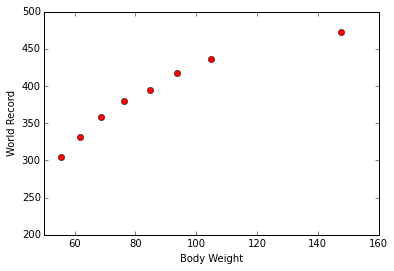

In [9]:
#plot of standarized total based on body weight
plt.plot(bw, total, 'ro')
plt.axis([50, 160, 200, 500])
plt.xlabel('Body Weight')
plt.ylabel('World Record')
plt.savefig('max.png')
plt.savefig('max.pdf')
plt.show()

[ -3.57405684e+00   2.22824595e+02   2.36698834e-02   4.93289885e+02]


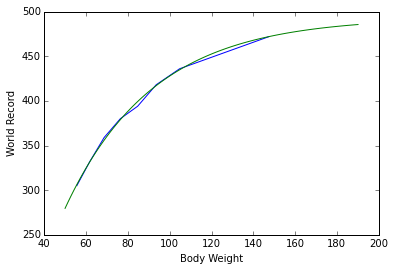

In [18]:
from pylab import *
from scipy.optimize import curve_fit

x = np.array(bw)
y = np.array(total)

def func(x, a, b, c, d):
    return a*np.exp(-c*(x-b))+d

popt, pcov = curve_fit(func, x, y, [10,100,0.001,0])
print(popt)

plot(x,y)
x=linspace(50,190,100)
plot(x,func(x,*popt))
plt.xlabel('Body Weight')
plt.ylabel('World Record')
plt.savefig('approxexp2.png')
plt.savefig('approxexp2.pdf')
show()

In [20]:
comparison = []
for i in range(len(bw)):
    comparison.append((bw[i], total[i]-func(bw[i], *popt)))

In [21]:
comparison

[(55.62, -1.2326600033341037),
 (61.81, 0.27357523934358596),
 (68.68, 3.0262619860883433),
 (76.4, 1.093337316727343),
 (84.69, -5.2864732139834132),
 (93.52, 0.9836487579574964),
 (104.76, 1.1662426761891425),
 (147.48, -0.024107224296926688)]

[  8.54777229e+01   4.13570740e+01   6.08256248e-03   5.12450855e+02]


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


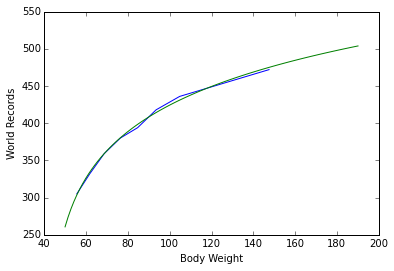

In [27]:
from pylab import *
from scipy.optimize import curve_fit

x = np.array(bw)
y = np.array(total)

def func(x, a, b, c, d):
    return a*np.log(c*(x-b))+d

popt, pcov = curve_fit(func, x, y, [10,50,0.001,0])
print(popt)

plot(x,y)
x=linspace(50,190,100)
plot(x,func(x,*popt))
plt.xlabel('Body Weight')
plt.ylabel('World Records')
plt.savefig('approxlog2.png')
plt.savefig('approxlog2.pdf')
show()

In [23]:
comparison2 = []
for i in range(len(bw)):
    comparison2.append((bw[i], total[i]-func(bw[i], *popt)))
    
print(comparison2)    

[(55.62, 1.5135965286452233), (61.81, -2.2979060334024553), (68.68, -0.052269727768702978), (76.4, -0.32319910717717448), (84.69, -4.4734528529509134), (93.52, 3.6739126830386795), (104.76, 4.9939608624491143), (147.48, -3.0345961433694697)]
